In [12]:
!pip install kaggle
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8/UNKNOWN
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 58 kB 455 kB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12

In [13]:
import os
import zipfile
import pandas as pd
from gensim.corpora import Dictionary
from gensim.models.phrases import Phrases, Phraser
from gensim.parsing.preprocessing import preprocess_string,strip_punctuation, STOPWORDS, strip_multiple_whitespaces, remove_stopwords, stem_text, STOPWORDS, strip_numeric, strip_tags
from gensim.models import LdaModel
import numpy as np
from bs4 import BeautifulSoup
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium.webdriver import ChromeOptions
from selenium import webdriver
import bs4 as bs
import urllib.request
import time



os.environ['KAGGLE_USERNAME'] = "keeganheilman"
os.environ['KAGGLE_KEY'] = ""

# Obtain resume data set

- download data set.
- decompress csv from zip.
- read csv as new Pandas DataFrame.


In [14]:
!kaggle datasets download -p ~/Documents/UM-MADS/courses/697_capstone/ -d gauravduttakiit/resume-dataset

100%|████████████████████████████████████████| 383k/383k [00:00<00:00, 1.37MB/s]
100%|████████████████████████████████████████| 383k/383k [00:00<00:00, 1.37MB/s]


In [16]:
# path = '/content/downloads/' ## PREVIOUS PATH FROM CoLab
path = '/home/friend/Documents/UM-MADS/courses/697_capstone/'
filename = 'resume-dataset.zip'

with zipfile.ZipFile(f'{path}{filename}', 'r') as zip_ref:
    zip_ref.extractall(f'{path}')

resumes_df = pd.read_csv(f"{path}UpdatedResumeDataSet.csv")

In [24]:
resumes_df.head()

,Category,Resume,tokens
0,Data Science,Skills * Programming Languages: Python (pandas...,"[skill, program, languag, python, panda, numpi..."
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,"[educ, uit, rgpv, data, scientist, data, scien..."
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","[area, deep, learn, control, design, program, ..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,"[skill, python, sap, hana, tableau, sap, hana,..."
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","[educ, mca, ymcaust, faridabad, haryana, data,..."


In [25]:
len(resumes_df['Category'].unique())

25

In [26]:

def clean_tokenize_text(resumes_df, column):
    CUSTOM_STOP_WORDS = ['â¢', 'â', 'â', 'â¢', 'â','®', '�',
                         '\\u200','comment','connect','message',
                         'share','mo','month','follow','report',
                         'block','profile','yr','year','date',
                         'contact','jan','january','feb','february',
                         'mar','march','apr','april','may','jun',
                         'june','jul','july','aug','august','sep',
                         'sept','september','oct','october','nov',
                         'november','dec','december'
                        ]
    CUSTOM_FILTERS = [lambda x: x.lower(), strip_tags, strip_punctuation, strip_multiple_whitespaces, remove_stopwords, strip_numeric, stem_text]
    resume_tokens = []
    resumes_tokens = []
    for s in resumes_df[column]:
        resume_tokens = preprocess_string(s, CUSTOM_FILTERS)
        resume_tokens = [x for x in resume_tokens if x not in STOPWORDS]
        resume_tokens = [x for x in resume_tokens if x not in CUSTOM_STOP_WORDS]
        resume_tokens = [x for x in resume_tokens if len(x) > 1]
        resumes_tokens.append(resume_tokens)
    resumes_df['tokens'] = resumes_tokens
    return resumes_df

resumes_df = clean_tokenize_text(resumes_df, 'Resume')
resumes_df.sample(10)

,Category,Resume,tokens
487,Electrical Engineering,Education Details \r\n\r\nElectrical engineeri...,"[educ, electr, engin, skill, microsft, offic, ..."
649,DevOps Engineer,Software Proficiency: â¢ Languages: Basics of...,"[softwar, profici, languag, basic, sql, pl, sq..."
785,ETL Developer,TechnicalProficiencies DB: Oracle 11g Domains:...,"[technicalprofici, db, oracl, domain, invest, ..."
431,SAP Developer,Skills: â¢ ETL â¢ Data Warehousing â¢ SQL/P...,"[skill, etl, data, wareh, sql, pl, sql, basic,..."
594,Python Developer,Education Details \r\nJune 2013 to June 2016 D...,"[educ, june, june, diploma, scienc, pune, maha..."
945,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...","[person, skill, quick, learner, eager, learn, ..."
833,DotNet Developer,"Technical Skills â¢ Languages: C#, ASP .NET M...","[technic, skill, languag, asp, net, mvc, html,..."
472,Automation Testing,"Technical Skills Summary I have completed ""COR...","[technic, skill, summari, complet, corpor, tra..."
166,Web Designing,Education Details \r\n B.C.A Bachelor Computer...,"[educ, bachelor, applic, pune, maharashtra, pu..."
135,Arts,â¢ Operating Systems: Windows XP / Vista / 07...,"[oper, window, xp, vista, educ, januari, paint..."


In [27]:

def append_bigrams(resumes_df):
    phrase_model = Phrases(resumes_df['tokens'], min_count=10)
    model = Phraser(phrase_model)
    resumes_bigrams = []
    for s in resumes_df['tokens']:
        resume_bigrams = model[s]
        resumes_bigrams.append(resume_bigrams)
    resumes_df['tokens'] = resumes_bigrams
    return resumes_df

resumes_tokens = clean_tokenize_text(resumes_df, 'Resume')
resumes_bigrams = append_bigrams(resumes_tokens)

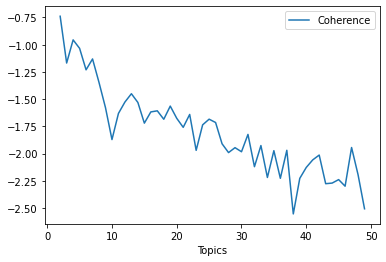

In [28]:

def find_topics(tokens, num_topics):
    # use gensim's Dictionary to filter words that appear less than ten times in the corpus
    # or represent more than 60% of the corpus
    dictionary =  Dictionary(tokens)
    dictionary.filter_extremes(no_below=0.2, no_above=0.6)
    # use the dictionary to create a bag of word representation of each document
    corpus = [dictionary.doc2bow(text) for text in tokens]
    # create gensim's LDA model 
    lda_model =  LdaModel(corpus,
                          num_topics= num_topics,
                          id2word=dictionary,
                          chunksize=2000,
                          passes=20,
                          iterations=400,
                          eval_every=None,
                          random_state=42,
                          alpha='auto',
                          eta='auto')
    return lda_model.top_topics(corpus=corpus)

def calculate_avg_coherence(topics):
    """
    Calculate the average coherence based on the top_topics returned by gensim's LDA model
    """
    sum_coherence = 0
    avg_topic_coherence = None
    n_topics = len(topics)
    
    for repr_topic_pairs,coherence in topics:
        sum_coherence += coherence
    avg_topic_coherence = sum_coherence / n_topics
    return avg_topic_coherence

def plot_coherences_topics(tokens):
    """
    Create a plot as shown above of coherence for the topic models created with num_topics varying from 2 to 10
    """
    # range of topics
    topics_range = range(2, 10, 1)
    topics = []
    coherence = []
    model_results = {'Topics': [],'Coherence': []}
    for n in topics_range:
        top_topics = find_topics(tokens, n)
        avg_coherence = calculate_avg_coherence(top_topics)
        topics.append(n)
        coherence.append(avg_coherence)
    model_results['Topics'] = topics
    model_results['Coherence'] = coherence
    plt = pd.DataFrame(model_results).set_index('Topics').plot()




resumes_df = clean_tokenize_text(resumes_df,'Resume')
resumes_df = append_bigrams(resumes_df)
resumes_df = resumes_df.dropna()
coherences_df = plot_coherences_topics(resumes_df['tokens'])

## Kaggle Indeed Jobs Dataset
* Build recommender system
* Input would be LinkedIn Profile
* Output would be recommended jobs (relevant Job Title)

In [30]:
!kaggle datasets download -p ~/Documents/UM-MADS/courses/697_capstone/ -d promptcloud/indeed-job-posting-dataset # api copied from kaggle

100%|█████████████████████████████████████▉| 48.0M/48.0M [00:22<00:00, 2.71MB/s]
100%|██████████████████████████████████████| 48.0M/48.0M [00:22<00:00, 2.25MB/s]


In [31]:
filename = 'indeed-job-posting-dataset.zip'

with zipfile.ZipFile(f'{path}{filename}', 'r') as zip_ref:
    zip_ref.extractall(f'{path}')

dat_indeed = pd.read_csv(f"{path}home/sdf/marketing_sample_for_trulia_com-real_estate__20190901_20191031__30k_data.csv")
dat_indeed.head()

,Job Title,Job Description,Job Type,Categories,Location,City,State,Country,Zip Code,Address,...,Employer Phone,Employer Logo,Companydescription,Employer Location,Employer City,Employer State,Employer Country,Employer Zip Code,Uniq Id,Crawl Timestamp
0,Shift Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Mission Hills, CA 91345",Mission Hills,CA,United States,91345,NaN,...,NaN,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,Del Taco is an American quick service restaura...,"Mission Hills, CA 91345",Mission Hills,CA,United States,91345,511f9a53920f4641d701d51d3589349f,2019-08-24 09:13:18 +0000
1,Operations Support Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Atlanta, GA 30342",Atlanta,GA,United States,30342,NaN,...,NaN,https://d2q79iu7y748jz.cloudfront.net/s/_logo/...,"Based in Atlanta, FOCUS Brands Inc. is an inno...",NaN,NaN,NaN,United States,NaN,4955daf0a3facbe2acb6c429ba394e6d,2019-09-19 08:16:55 +0000
2,Senior Product Manager - Data,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Chicago, IL",Chicago,IL,United States,NaN,NaN,...,NaN,NaN,Vibes Corp. reputation was built and establish...,NaN,NaN,NaN,United States,NaN,a0e0d12df1571962b785f17f43ceae12,2019-09-18 02:13:10 +0000
3,Part-Time Office Concierge,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Festus, MO",Festus,MO,United States,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN,56e411fd731f76ac916bf4fb169250e9,2019-10-24 16:39:13 +0000
4,Print & Marketing Associate,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Cedar Rapids, IA 52404",Cedar Rapids,IA,United States,52404,NaN,...,NaN,https://d2q79iu7y748jz.cloudfront.net/s/_logo/...,"Staples is The Worklife Fulfillment Company, h...","Cedar Rapids, IA 52404",Cedar Rapids,IA,United States,52404,3fff5c0ad6981bf4bff6260bd5feab63,2019-08-24 22:29:10 +0000


In [32]:
dat_indeed['job_description'] = [BeautifulSoup( raw_text, "lxml").text.replace('\n', ' ') for raw_text in dat_indeed['Job Description']]
dat_indeed.head()


,Job Title,Job Description,Job Type,Categories,Location,City,State,Country,Zip Code,Address,...,Employer Logo,Companydescription,Employer Location,Employer City,Employer State,Employer Country,Employer Zip Code,Uniq Id,Crawl Timestamp,job_description
0,Shift Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Mission Hills, CA 91345",Mission Hills,CA,United States,91345,NaN,...,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,Del Taco is an American quick service restaura...,"Mission Hills, CA 91345",Mission Hills,CA,United States,91345,511f9a53920f4641d701d51d3589349f,2019-08-24 09:13:18 +0000,WE ARE LOOKING FOR TOP PERFORMERS TO GROW WITH...
1,Operations Support Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Atlanta, GA 30342",Atlanta,GA,United States,30342,NaN,...,https://d2q79iu7y748jz.cloudfront.net/s/_logo/...,"Based in Atlanta, FOCUS Brands Inc. is an inno...",NaN,NaN,NaN,United States,NaN,4955daf0a3facbe2acb6c429ba394e6d,2019-09-19 08:16:55 +0000,JOB PURPOSE: This position is responsible fo...
2,Senior Product Manager - Data,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Chicago, IL",Chicago,IL,United States,NaN,NaN,...,NaN,Vibes Corp. reputation was built and establish...,NaN,NaN,NaN,United States,NaN,a0e0d12df1571962b785f17f43ceae12,2019-09-18 02:13:10 +0000,Product Manager - Unique opportunity with a mo...
3,Part-Time Office Concierge,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Festus, MO",Festus,MO,United States,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,United States,NaN,56e411fd731f76ac916bf4fb169250e9,2019-10-24 16:39:13 +0000,"Coldwell Banker in Festus, Missouri is lookin..."
4,Print & Marketing Associate,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Cedar Rapids, IA 52404",Cedar Rapids,IA,United States,52404,NaN,...,https://d2q79iu7y748jz.cloudfront.net/s/_logo/...,"Staples is The Worklife Fulfillment Company, h...","Cedar Rapids, IA 52404",Cedar Rapids,IA,United States,52404,3fff5c0ad6981bf4bff6260bd5feab63,2019-08-24 22:29:10 +0000,Description Position Summary: The Copy and P...


In [33]:
dat_indeed = clean_tokenize_text(dat_indeed, 'job_description')
dat_indeed =  append_bigrams(dat_indeed)
dat_indeed['tokens']

0        [look, perform, grow, del_taco, need, peopl, a...
1        [job, purpos, posit, respons, provid, oper, su...
2        [product, manag, uniqu, opportun, mobil, marke...
3        [coldwel_banker, festu, missouri, look, custom...
4        [descript, posit, summari, copi_print, associ,...
                               ...                        
29997    [littl, moneytre, famili, run, busi, provid, f...
29998    [self, storag, rental, consult, time, harrison...
29999    [product, support, specialist, respons, high, ...
30000    [let’, differ, ajinomoto, bio, pharma, servic,...
30001    [time, perman, busi, intellig, data, warehous,...
Name: tokens, Length: 30002, dtype: object

In [35]:
# Build Dictionary of {job_title+company_name: [job_description], ...}
def build_dictionary(df, job_title_col_name, company_col_name, job_description_col_name):
    jobs_dict = {}

    for index, row in df.iterrows():
        jobs_dict[row[job_title_col_name]] = row[job_description_col_name]
    return jobs_dict



def load_jobs():
    return build_dictionary(dat_indeed, 'Job Title', 'Company Name', 'tokens')



def load_resumes():
    resumes_df = resumes_df.sample(10)
    if 'index' not in resumes_df.columns :
        resumes_df.reset_index(inplace=True)
    resumes_df['key'] = [ 'resume' + str(index) for index in resumes_df['index']]
    resumes_df.drop('index', axis=1)
    return build_dictionary(resumes_df, 'key', 'Company Name', 'tokens')



def build_inverted_index(docs, min_df=1):
    """
    Take a collection of jobs and build an inverted index
    """
    # dict with keys as terms
    inv_index = {}

    for job_id in jobs:
        for idx, token in enumerate(jobs[job_id]):
            # check if word is a key in inv_index
            if token in inv_index:
                # check if the document_id is a key of the token
                if job_id in inv_index[token]:
                    inv_index[token][job_id][0] += 1
                    inv_index[token][job_id][1].append(idx)
                else:
                    # if the document does not exist, initialize
                    inv_index[token][job_id] = [1, [idx]]

            else:
                  # if the token does not exist, initialize
                inv_index[token] = {job_id:[1, [idx]]}
        if min_df > 1:
            keys_to_remove =[]
            for term in inv_index:
                term_freq = 0
            for job in inv_index[term]:
                term_freq += 1
        if term_freq < min_df:
            keys_to_remove.append(term)


        for key in keys_to_remove:
            del inv_index[key]

    return inv_index



In [36]:
jobs_dict = load_jobs()
jobs_inverted_index = build_inverted_index(jobs_dict, min_df=100)
# jobs_inverted_index.keys() ## Uncomment to see the inverted index keys

dict_keys(['report', 'assist', 'manag', 'gener', 'job', 'summari', 'function', 'jimmi_john', 'restaur', 'ensur', 'custom', 'servic', 'high', 'qualiti', 'product', 'deliv', 'profit', 'duti', 'respons', 'success', 'execut', 'fast', 'accur_sandwich', 'world_class', 'maintain', 'clean', 'organ', 'shift', 'time', 'posit', 'employe', 'allow', 'averag_hour', 'week', 'elig', 'health_insur', 'staff', 'approxim', 'assign', 'overse', 'evalu', 'work', 'recommend', 'promot', 'transfer', 'termin', 'base', 'perform', 'provid', 'train', 'new', 'deleg', 'order', 'receipt_storag', 'issu', 'food', 'labor', 'equip', 'paper', 'suppli', 'unit', 'minimum', 'loss_wast', 'theft', 'supervis', 'prepar', 'sale', 'forecast', 'item', 'estim', 'consum', 'oper', 'shopper_rush', 'period', 'mainten', 'effici', 'shopper', 'greet', 'cash_regist', 'assembl', 'check', 'complet', 'correct', 'receiv', 'rout', 'deliveri', 'serv', 'driver', 'maxim', 'busi', 'speed', 'daili', 'open', 'procedur', 'meat_veget', 'slice_bread', 'cl

In [40]:
import math
from collections import Counter


def retrieve_n_rank_jobs(inverted_index, queries, max_jobs=-1):
    """
    Retrieve documents in order of relevance from an inverted index based on some queries
    """
    jobs = load_jobs()
    ret_jobs = {}
    job_maxfreqs = {}
    tfidf = {}
    all_jobs = set([job for q_id in inverted_index for job in inverted_index[q_id]])
    n_jobs = len(all_jobs)
    
    # accumulate the term frequencies for each document that contains the term
    # repeat this procedure for all terms
    for query in queries:
        
        job_total_term_freq = {}
        
        for term in queries[query]:
            if term in inverted_index:
#                 print(term)
                for job in inverted_index[term]:
                    if job not in job_maxfreqs:
                        # calcuate jobs MaxFreq
                        job_terms = [term for term in jobs[job] if term in inverted_index]
                        job_tf = Counter(job_terms)
                        job_maxtermfreq = job_tf.most_common(1)[0][1]
                        job_maxfreqs[job] = job_maxtermfreq
                    # calculate tf-idf    
                    raw_termfreq = inverted_index[term][job][0]
                    termfreq = (0.5 + ((0.5 * raw_termfreq) / job_maxfreqs[job]))
                    invjobfreq = 1 + math.log( (n_jobs) / len(set(inverted_index[term] )))
                    tf_idf = termfreq*invjobfreq
                    if job in job_total_term_freq:
                        job_total_term_freq[job] += termfreq*invjobfreq
                    else:
                        job_total_term_freq[job] = termfreq*invjobfreq
    
        for job in job_total_term_freq:        
            job_total_term_freq[job] = np.round(job_total_term_freq[job],3)
        # rank the jobs found in descending order of their total term fequencies
        # if tied, lower job number is ranked higher

    
        if max_jobs > 0:
            ret_jobs[query] = [(item[0], item[1]) for item in sorted(job_total_term_freq.items(), key=lambda item: (item[1], item[0]), reverse=True)[:max_jobs]]
        else:
            ret_jobs[query] = [(item[0], item[1]) for item in sorted(job_total_term_freq.items(), key=lambda item: (item[1], item[0]), reverse=True)]   
    return ret_jobs

In [38]:

min_df = 10
jobs_dict = load_jobs()
inv_index = build_inverted_index(jobs_dict, min_df=min_df)


In [41]:
resume = "Lana Moiseeva\n \n\n\n      UI/UX Designer at Aviva Canada\n    \n \n\n        Toronto, Ontario, Canada\n      \n\n\n            Contact info\n          \n\n\n\n\n\n\n\n\n\n\n    Aviva Canada\n  \n\n\n\n\n\n\n\n\n\n\n    BrainStation\n  \n\n\n\n\n\n\n\n\n\n\n500+ connections\n        \n\n\n\n\n\n\n\n\n\n\n    Connect\n\n\n\n \n\n\n\n    Message\n\n\n\nMore\n\n\n\n\n\n\n\n\nShare profile in a message\nShare Lana Moiseeva’s profile via message\n\n\n\n\n\n\n\nSave to PDF\nSave Lana Moiseeva’s profile to PDF\n\n\n\n\n\n\n\nFollow\nFollow Lana Moiseeva\n\n\n\n\n\n\n\nReport / Block\nReport or block Lana Moiseeva’s profile\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n \n\n  Highlights\n\n\n\n\n\n\n \n\n\n    About\n  \n\n\n\n    I am a UX/UI Designer with an educational psychology and graphic design background.\xa0I started my career in an advertising agency and created multiple designs for various brands. I am passionate about working with people and have 5+ years of experience in teaching Adobe Design Suite. As a UX designer I am inspired by applying a user-centered approach to solve real-world problems and adopting new technologies to make this process more efficient and joyful.\xa0⦁\tSoftware Expertise: Adobe Xd, Photoshop, Illustrator, Lightroom, Corel Draw, Figma.\xa0⦁\tUX Skills: research, user Interviews, user observation, surveys, sketching, user personas, information architecture, wireframes, user flows, task flows, usability testing, low-fidelity prototyping, high-fidelity prototyping.⦁\tUI Skills: UI prototyping, choosing colors, typography, application icons.⦁\tGraphic Design Skills: digital/print advertising products, brand identities, consumer packaging, illustrations, professional magazine photo retouching.\xa0Feel free to visit my portfolio by following link https://lanamoiseeva.comI am open for cooperation. Please do not hesitate to contact me at lanamoiseeva7@gmail.com.\n  \n      \n…\n\n          see more\n        \n\n\n\n\n  \n\n\n    Activity\n  \n\n \n\n\n      1,244 followers\n    \n\n\n\n\n \n\n\n\n \n\n\n \n\n\n\n\n    incredible\n  \n\n\n\n\n\n    Lana commented\n  \n\n\n \n\n\n\n\n\n\n \n    See all activity\n  \n\n    See all activity\n  \n\n\n\n\n\n \n\n\n    Experience\n  \n\n\n  \n\n \n\n\n\nUI/UX Designer\nCompany Name\n\n      Aviva Canada\n        Contract Full-time\n\n\n\nDates Employed\nMar 2021 – Present\n\n\nEmployment Duration\n5 mos\n\n\n\nLocation\nToronto, Ontario, Canada\n\n\n\n\n \n \n\n  \n\n \n\n\n\nMultidisciplinary [ Graphic, UX/UI ] Designer \nCompany Name\n\n      Upwork\n        Freelance\n\n\n\nDates Employed\n2020 – Present\n\n\nEmployment Duration\n1 yr\n\n\n\nLocation\nToronto, Ontario, Canada\n\n\n\n\n\n\n    ⦁  conducted UX research & user testing. ⦁  created sketches, wireframes, user personas, information architecture, task flows, low and high fidelity prototypes. ⦁  established style guides, selected typography, colors, application icons and the general look.\xa0\n  \n      \n…\n\n          see more\n        \n\n\n\n \n\n  \n\n \n\n\n\nAdobe Design Suite Instructor \nCompany Name\n\n      Superprof\n        Freelance\n\n\n\nDates Employed\n2017 – Present\n\n\nEmployment Duration\n4 yrs\n\n\n\nLocation\nToronto, Ontario, Canada\n\n\n\n\n\n\n    ⦁  taught software applications and graphic design with focus on unique needs of each student, which allowed them to reach their specific goals. ⦁  created graphic design & animation training courses for students.\n  \n\n\n \n\n  \n\n \n\n\n\nGraphic Designer\nCompany Name\n\n      GoodPoint Software\n \n\n\nDates Employed\nNov 2017 – Mar 2020\n\n\nEmployment Duration\n2 yrs 5 mos\n\n\n\n\n\n\n\n\n    Developed the company\'s name, logo, symbol, corporate style and its image in social media. Selected colors, typography and application icons. Created multiple interfaces for 35 Microsoft SharePoint Apps from official Microsoft Office Store.\n  \n\n\n \n\n  \n\n \n\n\n\nTeacher of Graphic Design Applications\nCompany Name\n\n      «Specialist» Computer Training Center\n        Permanent Full-time\n\n\n\nDates Employed\nApr 2011 – Oct 2013\n\n\nEmployment Duration\n2 yrs 7 mos\n\n\n\nLocation\nMoscow, Russia\n\n\n\n\n\n\n    One of the Top Instructors based on students’ evaluations at the leading Russian Training Center Specialist. Was actively involved in the development of 9 courses  and prepared students to get official certificates and diplomas.\n  \n\n\n \n\n \n\n\n\n\n\n    Education\n  \n\n\n\n\n \n\n\n\n\nBrainStation\n\nDegree Name\nCertificate\n\n\nField Of Study\nUX Design\n\n \n\nDates attended or expected graduation\n\n2020 – 2020\n\n\n\n\n\n  User Experience Design course shows best practices for defining problems to be solved, conducting UX research, interviewing users, developing personas, wireframes, information architecture and high/low-fidelity prototyping.\n\n\n\n Media (1)\nThis position has 1 media\n\n\n\n\n\n\n  \n\n\n \n\n\n \n\n830-781-697.pdf\n\n\n\n\n    830-781-697.pdf\n  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSholokhov Moscow State University for Humanities, Russia\n\nDegree Name\nBachelor’s degree, Educational Psychologist\n\n\nField Of Study\nPsychology\n\n \n\nDates attended or expected graduation\n\n2010\n\n\n\n\n \n\n\n\n\n\n\n\n    Licenses & certifications\n  \n\n\n\n\n \n\n\n\n\n    Certificate «Color Theory for Designers»\n  \n\n\n        Issuing authority\n      \n\n        Coursera\n      \n\n\n\n        Issued date and, if applicable, expiration date of the certification or license\n      \nIssued Jul 2020No Expiration Date\n\n\n\n\n\n\n\n          See credential\n        \n\n\n\n\n \n\n\n\n\n    Certificate «Graphic Design Theory for Beginners»\n  \n\n\n        Issuing authority\n      \n\n        Coursera\n      \n\n\n\n        Issued date and, if applicable, expiration date of the certification or license\n      \nIssued Jun 2020No Expiration Date\n\n\n\n\n\n\n\n          See credential\n        \n\n\n\n\n \n\n\n\n\n    Adobe Certified Expert in Photoshop CS5\n  \n\n\n        Issuing authority\n      \n\n        Adobe\n      \n\n\n\n        Issued date and, if applicable, expiration date of the certification or license\n      \nIssued Mar 2012No Expiration Date\n\n\n\n\n        Credential Identifier\n      \n\n        Credential ID ID #ADB288577\n      \n\n\n\n\n\n\n          See credential\n        \n\n\n\n\n\n\n\n\n    Volunteer experience\n  \n\n\n\n\n \n\n\n\n Energy Exchange Program Volunteer\n\nCompany Name\nCity Dance Corps\n\n\nDates volunteered\nJan 2018 – Sep 2019\n\n\nVolunteer duration\n1 yr 9 mos\n\n\nCause\n\nArts and Culture\n\n\n\n\n  Worked as a receptionist welcoming clients and signing them in, answered questions, maintained classrooms and conducted customer surveys.\n\n\n\n\n\n \n\n\n\nSupport Volunteer \n\nCompany Name\nThe Women\'s Centre of Calgary\n\n\nDates volunteered\n2015\n\n\nVolunteer duration\nless than a year\n\n\nCause\n\nSocial Services\n\n\n\n\n  Volunteered to help support women\'s mental health via sharing experiences and friendly conversations. In addition, processed administrative work orders.\n\n\n\n\n\n \n\n\n\nMeal Serve Volunteer\n\nCompany Name\nCalgary Drop In & Rehab Centre Society\n\n\nDates volunteered\n2015\n\n\nVolunteer duration\nless than a year\n\n\nCause\n\nSocial Services\n\n\n\n\n  Helped at homeless-serving sector to serve food to people staying at Rehab Center.\n\n\n\n\n\n\n\n\n\n \n\n\n    Skills & endorsements\n  \n\n\n\n\n\n\n\n\n\n \n            Adobe Creative Suite\n          \n\n \n See 1 endorsement for Adobe Creative Suite\n1\n\n\n\n\n\n\n\n\n Steve Cockrille has given an endorsement for this skill\n \n\n\n \n\n\n\n\n\n\n \n            Graphic Design\n          \n\n \n See 1 endorsement for Graphic Design\n1\n\n\n\n\n\n\n\n\n Steve Cockrille has given an endorsement for this skill\n \n\n\n \n\n\n\n\n\n\n\n          UX/UI Design\n        \n \n\n\n\n\n\n\n\n\n\n\n                      Show more\n                    \n\n                      Show all of Lana’s skills\n                    \n\n\n\n\n\n\n\n \n\nRecommendations\n\n\n      Received (0)\n      Given (0)\n\n\n\n\n        Lana hasn’t received any recommendations yet.\n      \n\n\n\n        Lana hasn’t given any recommendations yet.\n      \n\n\n\n\n\nAccomplishments\n\n \n\nLana has 15 courses\n15\n\n\nCourses\n \n\n\n\n\n\n\nAdobe Illustrator CC for Beginners\nAdobe Illustrator CC for Intermediate and Advanced users\nAdobe Lightroom Training Course\nAdobe Photoshop CC for Beginners\nAdobe Photoshop CC for Intermediate and Advanced users\nAutoCAD for Design\nColor Theory for Designers\nCorporate Identity: The Concepts of Branding\nCorporate Identity: The concepts of branding\nDigital Photo Processing\nGraphic Design Theory for Beginners\nGraphic Design in Adobe Photoshop CC\nIntroduction to User Experience Design\nProfessional Retouching\nUser Experience Design\n\n\n\n \n\nLana has 2 languages\n2\n\n\nLanguages\n \n\n\n\n\n\n\nEnglish\nRussian\n\n\n\n\n\n \nInterests\n\n \n\n\nThe Walt Disney Company\n\n\n4,454,937 followers\n\n\n \n\n\nNetflix\n\n\n7,331,042 followers\n\n\n \n\n\nAviva\n\n\n201,211 followers\n\n\n \n\n\nPro-X Exhibit\n\n\n170 followers\n\n\n \n\n\nAviva Canada\n\n\n61,407 followers\n\n\n \n\n\nCreative Circle\n\n\n425,120 followers\n\n\n\n See all\nSee all following\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n    English\n\n\n\n    Русский\n\n\n \n\n\n\n\n \n\n\n\n\n\n \n \n\n"
linkedin_df = clean_tokenize_text(pd.DataFrame({'profile_name': ['linkedin'], 'profile_details': [resume]}, ), 'profile_details')
linkedin_df =  append_bigrams(linkedin_df)
linkedinprofile = build_dictionary(linkedin_df, 'profile_name', 'Company Name', 'tokens')
max_jobs = 3 # number of jobs to return in query
ret_jobs = retrieve_n_rank_docs(inv_index, linkedinprofile, max_jobs=max_jobs)



ui
ux
design
canada
toronto
ontario
canada
contact
info
canada
connect
connect
messag
share
profil
messag
share
profil
messag
save
pdf
save
profil
pdf
follow
follow
report
block
report
block
profil
highlight
ux
ui
design
educ
psycholog
graphic
design
background
start
career
advertis
agenc
creat
multipl
design
brand
passion
work
peopl
year
experi
teach
adob
design
suit
ux
design
inspir
appli
user
center
approach
solv
real
world
problem
adopt
new
technolog
process
effici
joy
softwar
expertis
adob
xd
photoshop
illustr
lightroom
corel
draw
figma
ux
skill
research
user
interview
user
observ
survei
sketch
user
persona
inform
architectur
wirefram
user
flow
task
flow
usabl
test
low
fidel
prototyp
high
fidel
prototyp
ui
skill
ui
prototyp
choos
color
typographi
applic
icon
graphic
design
skill
digit
print
advertis
product
brand
ident
consum
packag
illustr
profession
magazin
photo
retouch
feel
free
visit
portfolio
follow
link
http
open
cooper
hesit
contact
gmail
com
activ
follow
incred
comment
ac

In [42]:
ret_docs

{'linkedin__profile_name': [('User Experience Lead', 524.871),
  ('Director, Digital UX Design', 511.751),
  ('2020 User Experience Design Intern', 445.663),
  ('Certification Instructor/Course Developer', 382.57),
  ('User Experience Designer IV', 375.15),
  ('Appraiser II, Greeley-TERM LIMITED RESIDENCY WAIVER', 373.796),
  ('Store Planning Specialist NF4', 372.989)]}